# Training with the Fastai's CNN

* Based on https://medium.com/deena-does-data-science/train-a-cnn-with-the-fastai-library-88712a68e4d4
* But the goal is, instead of the canser dataset, use USD/EUR candlestick captures from https://finviz.com/forex_charts.ashx?t=EURUSD&tf=m5. Labels are HOLD, BUY and SELL.

* Drawing candlestick-chart with Python: https://www.techtrekking.com/how-to-plot-simple-and-candlestick-char*t-using-python-pandas-matplotlib/

In [1]:
!echo Using `python --version`
!echo
!echo Current directory `pwd`
!echo
!echo Available image data folders:
!du -sh data/eurusd/m5/*

Using Python 3.7.1

Current directory /home/jovyan/work

Available image data folders:
204K	data/eurusd/m5/buy
5.9M	data/eurusd/m5/hold
204K	data/eurusd/m5/sell


In [2]:
from pathlib import Path
from random import shuffle
import pandas as pd

## 1. Make a dataframe

In [14]:
# A regular list of some images

fpaths = list(Path('./data/eurusd').rglob('*.png'))
fstems = [fp.stem for fp in fpaths]

In [15]:
# Series of the same images

df = pd.concat([pd.Series(fpaths, name='fpaths'), 
                pd.Series(fstems, name='fstems')], 
               axis=1)
df.head()

,fpaths,fstems
0,data/eurusd/m5/buy/1552422458.png,1552422458
1,data/eurusd/m5/buy/1552422481.png,1552422481
2,data/eurusd/m5/buy/1552431235.png,1552431235
3,data/eurusd/m5/buy/1552487714.png,1552487714
4,data/eurusd/m5/buy/1552422900.png,1552422900


In [16]:
# Convert 'fpaths' column from the object-type the string 

df['fpaths'] = df['fpaths'].apply(lambda x: str(x))
df.head()

,fpaths,fstems
0,data/eurusd/m5/buy/1552422458.png,1552422458
1,data/eurusd/m5/buy/1552422481.png,1552422481
2,data/eurusd/m5/buy/1552431235.png,1552431235
3,data/eurusd/m5/buy/1552487714.png,1552487714
4,data/eurusd/m5/buy/1552422900.png,1552422900


In [17]:
# Make *label* column

df['label'] = df['fpaths'].str.split('/', expand=True)[3]
df.head()

,fpaths,fstems,label
0,data/eurusd/m5/buy/1552422458.png,1552422458,buy
1,data/eurusd/m5/buy/1552422481.png,1552422481,buy
2,data/eurusd/m5/buy/1552431235.png,1552431235,buy
3,data/eurusd/m5/buy/1552487714.png,1552487714,buy
4,data/eurusd/m5/buy/1552422900.png,1552422900,buy


In [18]:
# Export the dataframe to a csv file

df.to_csv('/tmp/mydataframe.csv')
!head /tmp/mydataframe.csv

,fpaths,fstems,label
0,data/eurusd/m5/buy/1552422458.png,1552422458,buy
1,data/eurusd/m5/buy/1552422481.png,1552422481,buy
2,data/eurusd/m5/buy/1552431235.png,1552431235,buy
3,data/eurusd/m5/buy/1552487714.png,1552487714,buy
4,data/eurusd/m5/buy/1552422900.png,1552422900,buy
5,data/eurusd/m5/buy/1552422203.png,1552422203,buy
6,data/eurusd/m5/buy/1552506821.png,1552506821,buy
7,data/eurusd/m5/buy/1552425422.png,1552425422,buy
8,data/eurusd/m5/buy/1552498055.png,1552498055,buy


In [19]:
# Import the csv to the dataframe

df = pd.read_csv('/tmp/mydataframe.csv')
df.head()

,Unnamed: 0,fpaths,fstems,label
0,0,data/eurusd/m5/buy/1552422458.png,1552422458,buy
1,1,data/eurusd/m5/buy/1552422481.png,1552422481,buy
2,2,data/eurusd/m5/buy/1552431235.png,1552431235,buy
3,3,data/eurusd/m5/buy/1552487714.png,1552487714,buy
4,4,data/eurusd/m5/buy/1552422900.png,1552422900,buy


## 2. Make a databunch (a set of datasets and dataloaders)

In [20]:
from fastai import *
from fastai.vision import *
from fastai.vision.image import *
from fastai.vision.data import  * 

tfms = get_transforms(do_flip=False, 
                      flip_vert=False, 
                      max_rotate=0., 
                      max_zoom=1.0, 
                      max_lighting=0.2,
                      max_warp=0., 
                      p_affine=0.75, 
                      p_lighting=0.75)

data = ImageList\
    .from_df(path='.', df=df, cols='fpaths')\
    .split_by_rand_pct(valid_pct=0.2, seed=10)\
    .label_from_df(cols='label')\
    .transform(tfms=tfms, size=49, padding_mode='reflection')\
    .databunch(bs=128, num_workers=4)

data

ImageDataBunch;

Train: LabelList (4694 items)
x: ImageList
Image (3, 49, 49),Image (3, 49, 49),Image (3, 49, 49),Image (3, 49, 49),Image (3, 49, 49)
y: CategoryList
buy,buy,buy,buy,buy
Path: .;

Valid: LabelList (1173 items)
x: ImageList
Image (3, 49, 49),Image (3, 49, 49),Image (3, 49, 49),Image (3, 49, 49),Image (3, 49, 49)
y: CategoryList
hold,hold,hold,hold,hold
Path: .;

Test: None

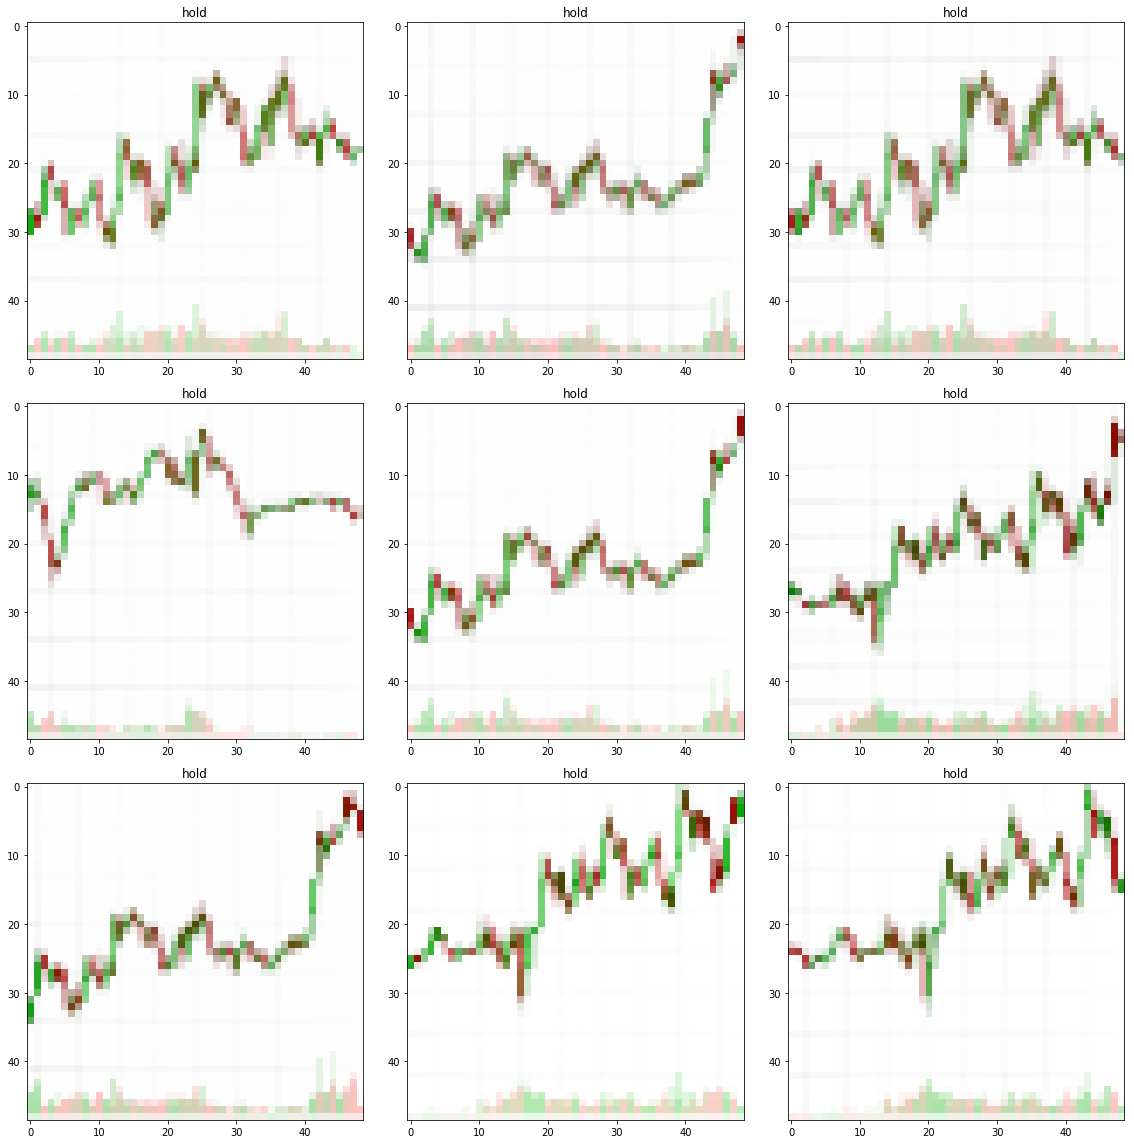

In [21]:
data.show_batch(rows=3, figsize=(16, 16), hide_axis=False)

In [11]:
# normalization

#data = data.normalize()